<a href="https://colab.research.google.com/github/lalitha-sahitya/Spam-SMS-Detection/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd
od.download('https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


100%|██████████| 211k/211k [00:00<00:00, 42.5MB/s]

In [4]:
os.listdir('sms-spam-collection-dataset')

['spam.csv']

In [5]:
df=pd.read_csv('/content/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df=df.rename(columns={'v1':'target','v2':'text'})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['target']=df.target.map({'ham':0,'spam':1})
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
x=df['text']
y=df['target']

In [12]:
x

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [13]:
y

,target
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
x_train

,text
1978,No I'm in the same boat. Still here at my moms...
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935,They r giving a second chance to rahul dengra.
4078,O i played smash bros &lt;#&gt; religiously.
4086,PRIVATE! Your 2003 Account Statement for 07973...
...,...
3772,I came hostel. I m going to sleep. Plz call me...
5191,"Sorry, I'll call later"
5226,Prabha..i'm soryda..realy..frm heart i'm sory
5390,Nt joking seriously i told


In [16]:
y_train

,target
1978,0
3989,1
3935,0
4078,0
4086,1
...,...
3772,0
5191,0
5226,0
5390,0


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_train=cv.fit_transform(x_train)
x_test=cv.transform(x_test)

In [18]:
x_train

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [35]:
def try_model(model):
  model.fit(x_train,y_train)
  train_preds=model.predict(x_train)
  train_accuracy=accuracy_score(y_train,train_preds)
  preds=model.predict(x_test)
  print(confusion_matrix(y_test,preds))
  accuracy=accuracy_score(y_test,preds)
  print(f'Train Accuracy: {train_accuracy}')
  print(f'Test Accuracy: {accuracy}')

In [36]:
nb=MultinomialNB()
try_model(nb)

[[963   2]
 [ 16 134]]
Train Accuracy: 0.9943908458604442
Test Accuracy: 0.9838565022421525


In [37]:
lr=LogisticRegression()
try_model(lr)

[[965   0]
 [ 24 126]]
Train Accuracy: 0.9984294368409243
Test Accuracy: 0.97847533632287


In [38]:
dtc=DecisionTreeClassifier(random_state=42,max_depth=10)
try_model(dtc)

[[956   9]
 [ 24 126]]
Train Accuracy: 0.9771146511106125
Test Accuracy: 0.9704035874439462


In [39]:
rfc=RandomForestClassifier(random_state=42,n_estimators=100,n_jobs=-1)
try_model(rfc)

[[965   0]
 [ 27 123]]
Train Accuracy: 1.0
Test Accuracy: 0.9757847533632287


In [40]:
ad=AdaBoostClassifier(random_state=42,n_estimators=100)
try_model(ad)

[[960   5]
 [ 23 127]]
Train Accuracy: 0.9934933811981154
Test Accuracy: 0.9748878923766816


In [41]:
gb=GradientBoostingClassifier(random_state=42,n_estimators=100)
try_model(gb)

[[963   2]
 [ 31 119]]
Train Accuracy: 0.9851918330715728
Test Accuracy: 0.9704035874439462


In [42]:
bg=BaggingClassifier(random_state=42,n_estimators=100)
try_model(bg)

[[955  10]
 [ 19 131]]
Train Accuracy: 1.0
Test Accuracy: 0.9739910313901345


In [43]:
svmr=SVC(random_state=42,kernel='rbf')
try_model(svmr)

[[965   0]
 [ 23 127]]
Train Accuracy: 0.997083239847431
Test Accuracy: 0.979372197309417


In [44]:
nb.fit(x_train,y_train)

MultinomialNB()

In [52]:
preds = nb.predict(x_test)

In [53]:
import matplotlib.pyplot as plt

In [54]:
models = [lr, dtc, rfc, ad, gb, bg, svmr, nb]
model_names = ['lr', 'dtc', 'rfc', 'ad', 'gb', 'bg', 'svmr', 'nb']

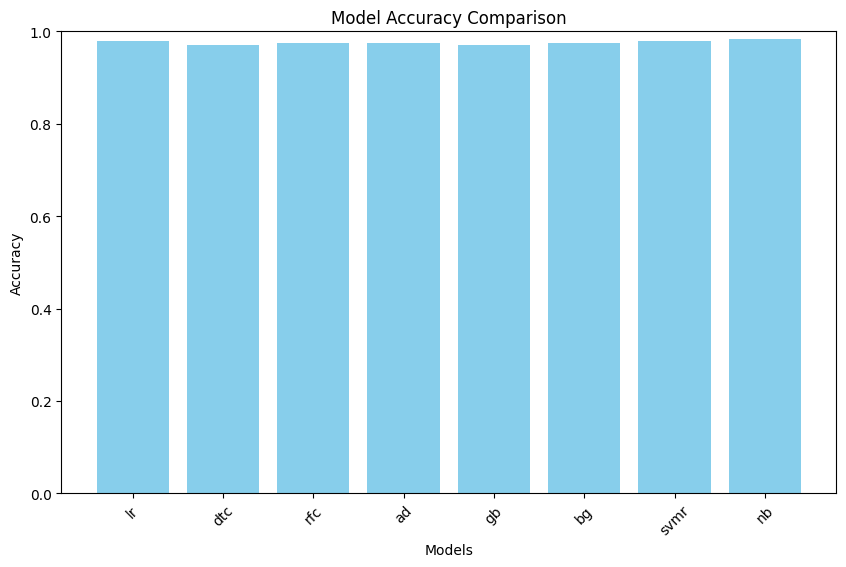

In [58]:
accuracies = []
for model in models:
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, preds)
    accuracies.append(accuracy)
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

<Axes: >

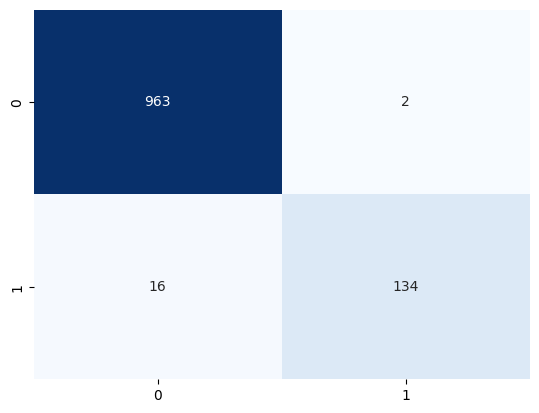

In [49]:
import seaborn as sns
cf=confusion_matrix(y_test,preds)
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', cbar=False)